<a href="https://colab.research.google.com/github/MichalisSant/Mike_Sant/blob/main/Ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U ppscore numpy pandas

import pandas as pd
import numpy as np
import ppscore as pps

Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Successfully uninstalled numpy-1.26.0
  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
holoviews 1.21.0 requires pandas>=1.3, which is not installed.
cmdstanpy 1.2.5 requires pandas, which is not installed.
statsmodels 0.14.5 requires pandas!=2.1.0,>=1.4, which is not installed.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.
tensorflow-decision-forests 1.11.0 requires pandas, which is not installed.
libpysal 4.13.0 requires pandas>=1.4, which is not installed.
sklearn-pandas 2

  Using cached pandas-2.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which

In [ ]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [ ]:
dataset_numeric= dataset.select_dtypes(include=['int64', 'float64'])


In [ ]:
pps_matrix = pps.matrix(dataset_numeric)

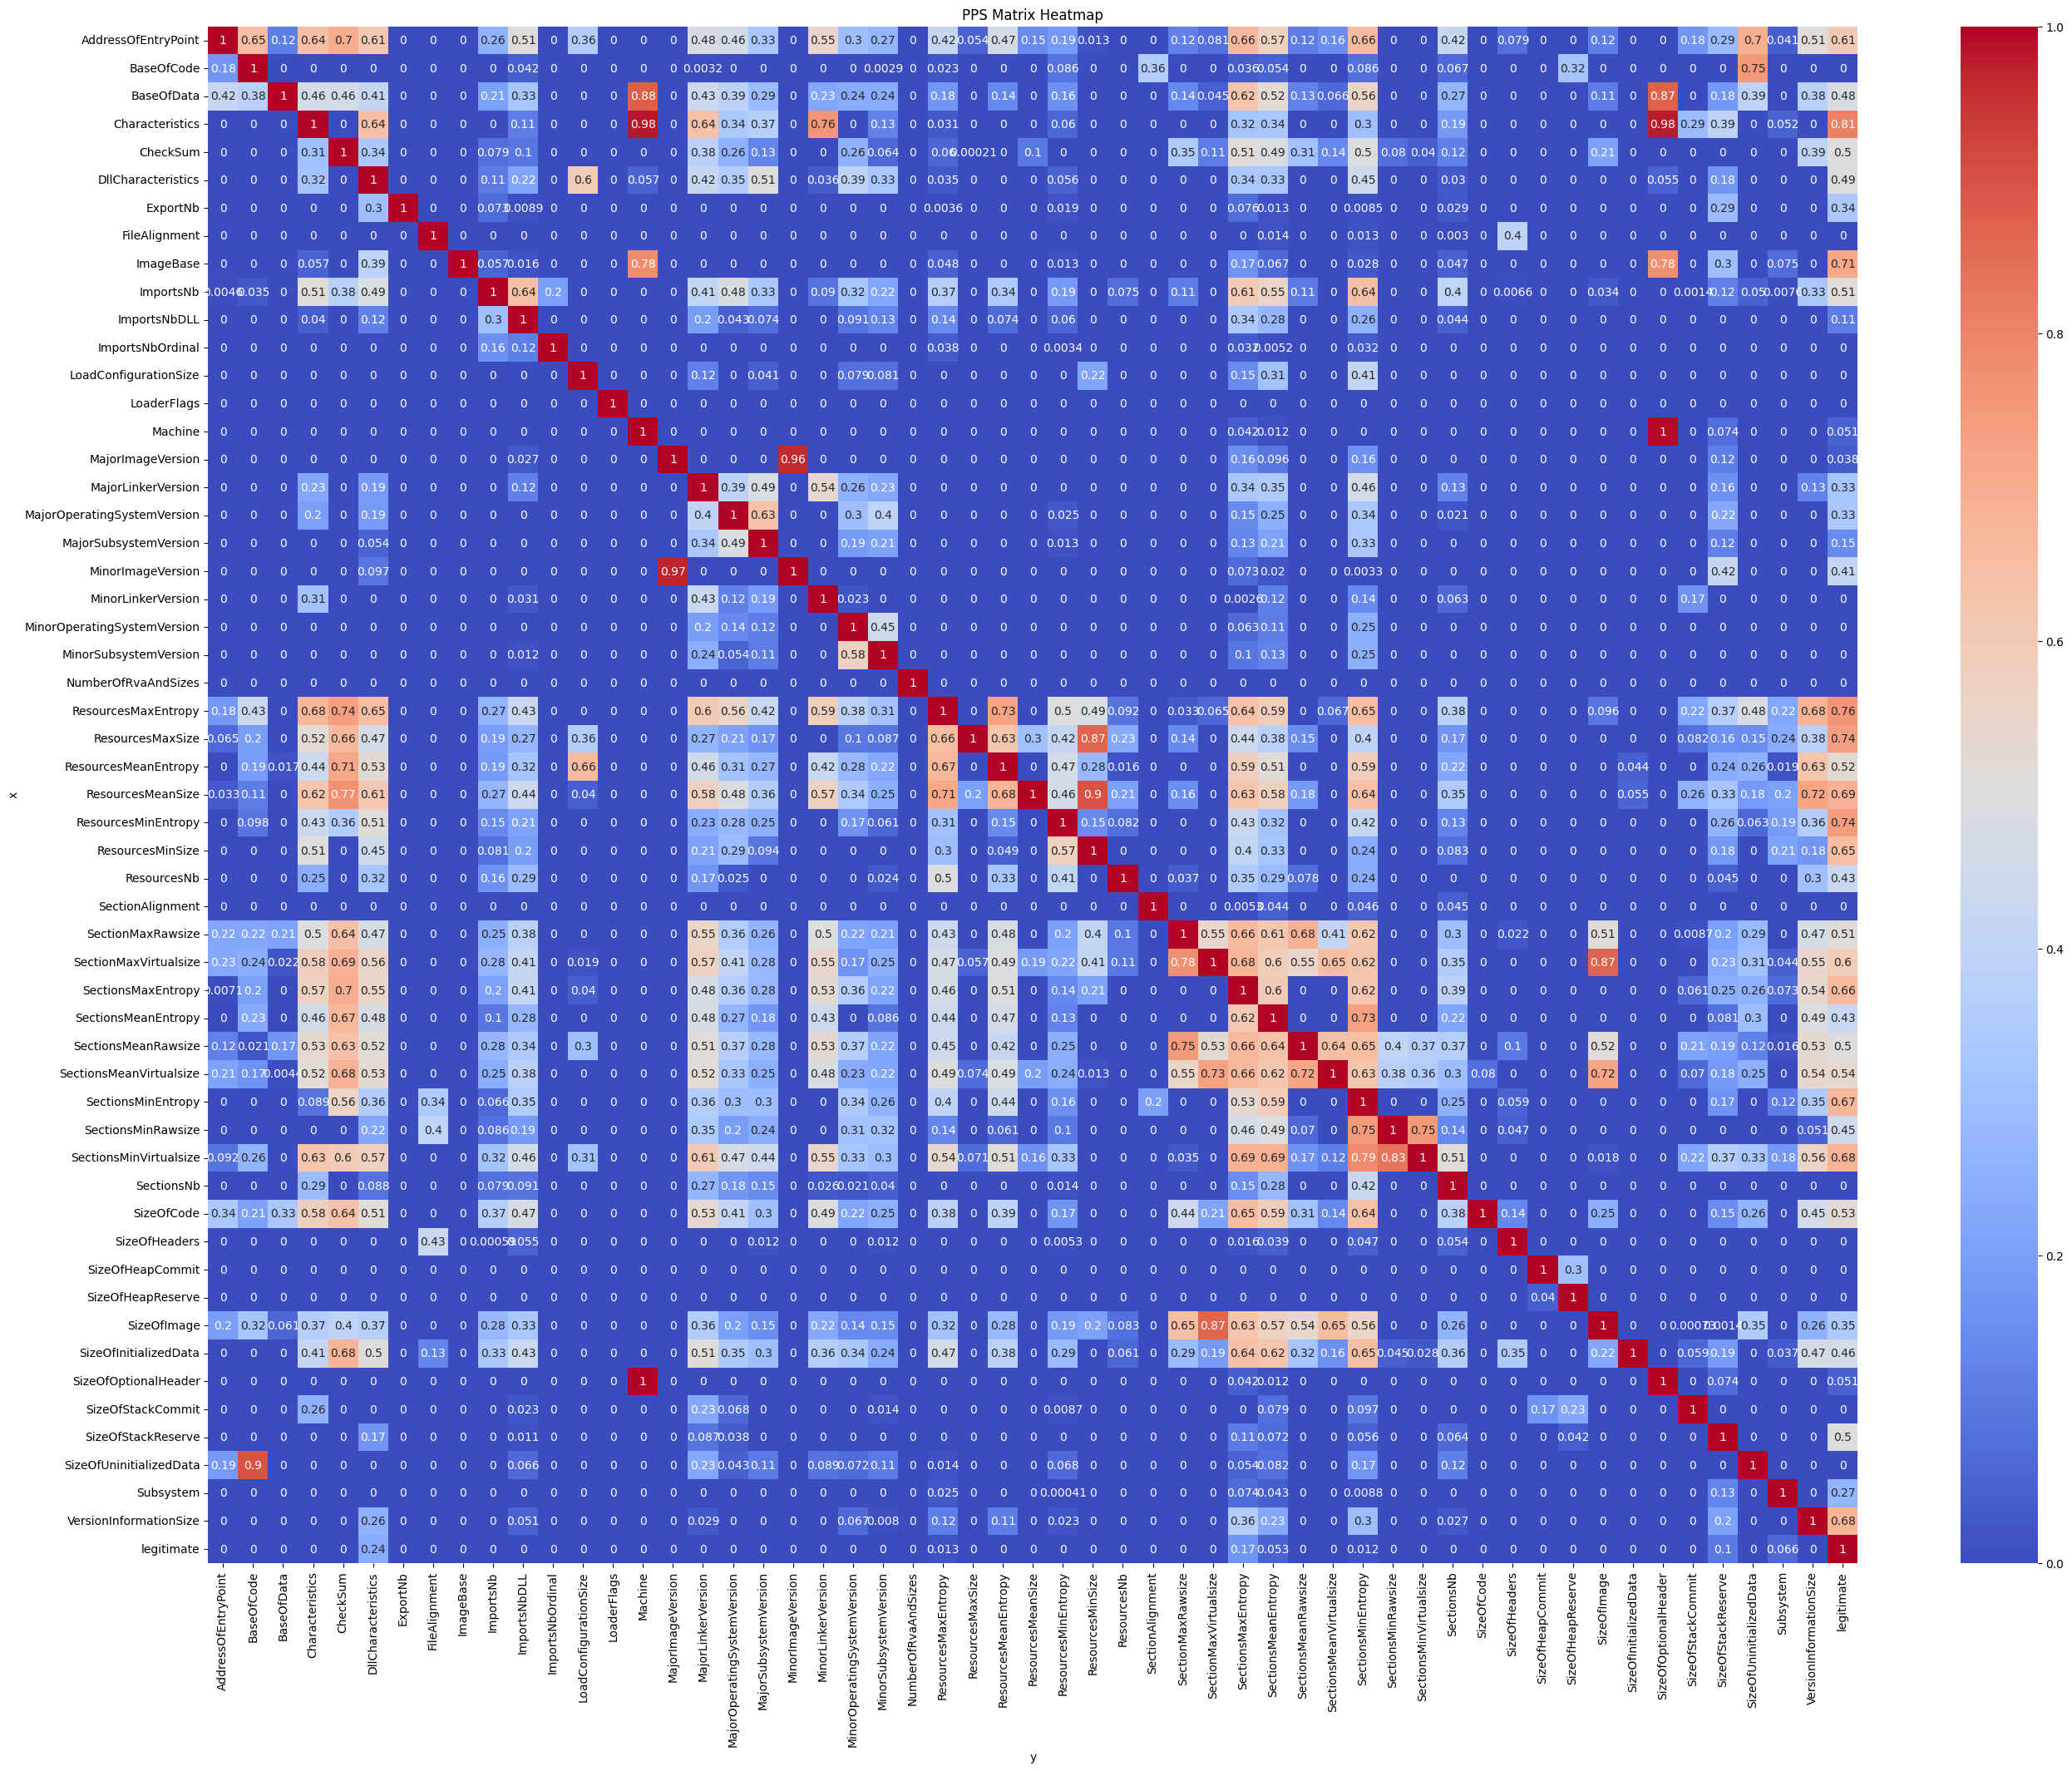

In [ ]:
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')

plt.figure(figsize=(32, 24))
sns.heatmap(pps_pivot, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("PPS Matrix Heatmap")
plt.show()

In [ ]:
target = 'CheckSum'  # change this to your actual target column

pps_scores = dataset_numeric.drop(columns=target).apply(lambda col: pps.score(dataset_numeric, col.name, target)['ppscore'])

selected_features = pps_scores[pps_scores > 0.1].sort_values(ascending=False)
print("Selected features based on PPS:\n", selected_features)

Selected features based on PPS:
 ResourcesMeanSize          0.771214
ResourcesMaxEntropy        0.736070
ResourcesMeanEntropy       0.711831
AddressOfEntryPoint        0.701509
SectionsMaxEntropy         0.696772
SectionMaxVirtualsize      0.689896
SectionsMeanVirtualsize    0.684414
SizeOfInitializedData      0.675921
SectionsMeanEntropy        0.671526
ResourcesMaxSize           0.661508
SectionMaxRawsize          0.639063
SizeOfCode                 0.636428
SectionsMeanRawsize        0.633393
SectionsMinVirtualsize     0.604607
SectionsMinEntropy         0.560924
BaseOfData                 0.457872
SizeOfImage                0.398157
ImportsNb                  0.377948
ResourcesMinEntropy        0.358497
dtype: float64
